In [70]:
#testing out an interesting hypothesis
import numpy as np
def create_array(total, proportion):
    Arr = [1]*int(total*proportion)+[0]*int(total*(1-proportion))
    arr = np.array(Arr)
    np.random.shuffle(arr)
    return(arr)
def required_samples(epsilon, delta=1.96, pop_size=10000, p_hat=.5):
    #we can overestimate how many samples we need by making p_hat .5 when unknown
    return (delta**2)*(p_hat*(1-p_hat))/(epsilon**2)
def required_samples_b(epsilon, delta=1.96, pop_size=10000, p_hat=.5, num=1):
    a = 1-(1-(p_hat+epsilon))**num
    b = 1-(1-(p_hat-epsilon))**num
    p_hat_b = (a+b)/2
    epsilon_b = (a-b)/2
    if epsilon_b == 0:
        print(p_hat)
        print(num)
        print(epsilon)
    return (delta**2)*(p_hat_b*(1-p_hat_b))/((epsilon_b**2))
def get_estimate(pop,prop,epsilon):
    arr = create_array(pop,prop)
    count = 0
    for i in range(int(required_samples(epsilon))):
        if arr[np.random.randint(pop)] == 1:
            count+=1
    return(count/required_samples(epsilon))
def get_estimate(pop, prop, epsilon, size):
    arr = create_array(pop,prop)
    count = 0
    for i in range(int(required_samples(epsilon, p_hat=.5**size))):
        exists = False
        samples = np.random.randint(len(arr), size=size)
        #print(samples)
        for sample in samples:
            if arr[sample] == 1:
                exists = True
        if exists:
            count +=1
    a = count/required_samples(epsilon, p_hat=.5**size)
    return(1-(1-a)**(1/size))

In [24]:
create_array(10,.5)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [19]:
required_samples(.001)

960400.0

In [28]:
#now we test if this falls within the interval 95% of the time
a = create_array(1000000,.5)
print(a)
np.random.shuffle(a)
print(a)

[1 0 0 ... 0 1 0]
[0 0 0 ... 1 0 0]


In [41]:
#first we create the estimate with the proper number of samples
POP = 1000000
PROP = .5
epsilon = .02

count = 0
for i in range(5000):
    if abs(PROP - get_estimate(POP,PROP,epsilon)) < .02:
        count +=1
print(count/1000)

4.744


In [42]:
print (count/5000)

0.9488


In [95]:
PROP = .5
get_estimate(POP,PROP,epsilon,9)

[861573  71479 711695  72276 706585 991463 256746 217832 487294]
[394439 703932 424428 800665 716193 207480 690009 486640 718549]
[312671 557859  84762  98127 586868 580820 313365 683217 868116]
[116288 172565 232348 341405 510742 225774 950508 428617 654538]
[286055 601202 103967 907885 754107 320982 652120 778496 108490]
[137283 538198 477837  33534 705541 662391 875676 504154 861781]
[498937  79880  34744 140926 663080 322414 186640 315847 501934]
[642462 508370 876435 329026 147652 725989 629932 282772 711369]
[536737 485905 339695 489202 615620 329891 939992 501247 525603]
[257915 175673 779864 507374 121378 327150 877156 291009 579042]
[372553 257391  77758 581478 483689 551100 208077 921390 144456]
[990554 290676 962719 740434 872517 102157 697299  55445 344263]
[114007 460946 171862 532488 571594 790059 166274 169296 453672]
[ 71062 501621 411329 554827 518572 963666 737334 763294 275576]
[ 92153 714320 296811 649210  55167 358858 845046 494972 628517]
[247725 457232 151030 653

0.504551168923344

In [107]:
count = 0
epsilon = .05
PROP = .1
for i in range(1000):
    if abs(PROP - get_estimate(POP,PROP,epsilon,4)) < epsilon:
        count +=1
print(count/1000)

0.994


In [96]:
print(required_samples(epsilon))

38415.99999999999


In [100]:
for i in range(1,20):
    print(required_samples(epsilon, p_hat=.5**i))

38415.99999999999
28811.999999999996
16806.999999999996
9003.749999999998
4651.937499999999
2363.4843749999995
1191.12109375
597.9052734374999
299.53881835937494
149.91595458984372
74.99461364746092
37.50646591186523
18.755522727966305
9.378333806991575
4.689310014247893
2.344690784811973
1.1723543368279932
0.5861794045194982
0.2930902612861246


In [ ]:
def required_samples(epsilon, delta=1.96, pop_size=10000, p_hat=.5):
    #we can overestimate how many samples we need by making p_hat .5 when unknown
    return (delta**2)*(p_hat*(1-p_hat))/(epsilon**2)

In [52]:
M = [required_samples(.02, p_hat=n/1000) for n in range(100)]
M_b_2 = [required_samples_b(.02, p_hat=n/1000, num=2) for n in range(100)]
M_b_3 = [required_samples_b(.02, p_hat=n/1000, num=3) for n in range(100)]
M_b_4 = [required_samples_b(.02, p_hat=n/1000, num=4) for n in range(100)]
M_b_10 = [required_samples_b(.02, p_hat=n/1000, num=10) for n in range(100)]
M_b_20 = [required_samples_b(.02, p_hat=n/1000, num=20) for n in range(100)]

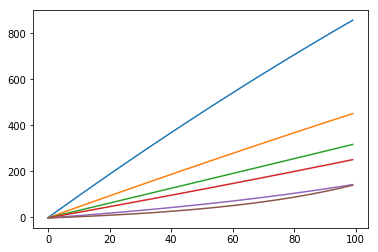

In [53]:
import matplotlib.pyplot as plt
plt.plot(M)
plt.plot(M_b_2)
plt.plot(M_b_3)
plt.plot(M_b_4)
plt.plot(M_b_10)
plt.plot(M_b_20)

In [88]:
def plot_lines(a, epsilon):
    M = [required_samples(epsilon, p_hat=n/(100*a)) for n in range(10+int(a*epsilon),100)]
    M_b_2 = [required_samples_b(epsilon, p_hat=n/(100*a), num=2) for n in range(10+int(a*epsilon),100)]
    M_b_3 = [required_samples_b(epsilon, p_hat=n/(100*a), num=3) for n in range(10+int(a*epsilon),100)]
    M_b_4 = [required_samples_b(epsilon, p_hat=n/(100*a), num=4) for n in range(10+int(a*epsilon),100)]
    M_b_10 = [required_samples_b(epsilon, p_hat=n/(100*a), num=10) for n in range(10+int(a*epsilon),100)]
    M_b_a = [required_samples_b(epsilon, p_hat=n/(100*a), num=2*a) for n in range(10+int(a*epsilon),100)]
    arr = [i/(a*100) for i in range(int(len(M)))]
    plt.plot(arr,M, label='Original')
    plt.plot(arr,M_b_2, label='2 Samples')
    plt.plot(arr,M_b_3, label='3 Samples')
    plt.plot(arr,M_b_4, label='4 Samples')
    plt.plot(arr,M_b_10, label='10 samples')
    plt.plot(arr,M_b_a, label=f'{a} samples')
    plt.xticks(arr[0::10])
    plt.legend()
    plt.show()

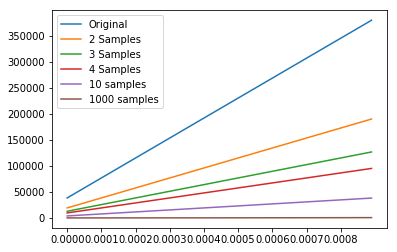

In [90]:
plot_lines(1000,.0001)

In [91]:
def interesting(a, epsilon):
    M_b_a = [required_samples_b(epsilon, p_hat=n/(100*a), num=2*a) for n in range(10+int(a*epsilon),100)]
    return M_b_a

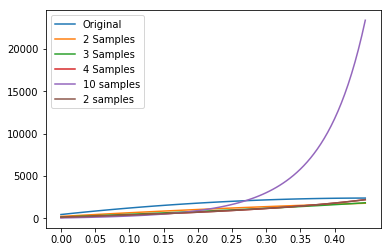

In [94]:
plot_lines(2,.02)